In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import datetime

In [16]:
df = pd.read_csv('E-commerce Dataset.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [18]:
df.head(5)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [19]:
df.shape

(51290, 16)

In [20]:
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [21]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Aging', 'Customer_Id', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost'],
      dtype='object')

In [22]:
df.select_dtypes(include=['object']).columns

Index(['Order_Date', 'Time', 'Gender', 'Device_Type', 'Customer_Login_type',
       'Product_Category', 'Product', 'Order_Priority', 'Payment_method'],
      dtype='object')

In [23]:
# df_new without missing values
df_new = df.dropna()

In [24]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         0
Payment_method         0
dtype: int64

In [25]:
df_new.shape

(51282, 16)

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51282 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51282 non-null  object 
 1   Time                 51282 non-null  object 
 2   Aging                51282 non-null  float64
 3   Customer_Id          51282 non-null  int64  
 4   Gender               51282 non-null  object 
 5   Device_Type          51282 non-null  object 
 6   Customer_Login_type  51282 non-null  object 
 7   Product_Category     51282 non-null  object 
 8   Product              51282 non-null  object 
 9   Sales                51282 non-null  float64
 10  Quantity             51282 non-null  float64
 11  Discount             51282 non-null  float64
 12  Profit               51282 non-null  float64
 13  Shipping_Cost        51282 non-null  float64
 14  Order_Priority       51282 non-null  object 
 15  Payment_method       51282 non-null 

In [27]:
df_new.describe().round(2)

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51282.00,51282.00,51282.00,51282.00,51282.00,51282.00,51282.00
mean,5.26,58159.75,152.34,2.50,0.30,70.40,7.04
std,2.96,26031.76,66.49,1.51,0.13,48.73,4.87
min,1.00,10000.00,33.00,1.00,0.10,0.50,0.10
25%,3.00,35841.50,85.00,1.00,0.20,24.90,2.50
50%,5.00,61021.50,133.00,2.00,0.30,59.90,6.00
75%,8.00,80739.25,218.00,4.00,0.40,118.40,11.80
max,10.50,99999.00,250.00,5.00,0.50,167.50,16.80


In [28]:
df_small = df_new.sample(frac=0.04)

In [29]:
df_small.shape

(2051, 16)

In [30]:
df_new.shape

(51282, 16)

**Add the column - amount_spent**

In [31]:
df_small['amount_spent'] = df_new['Quantity'] * df_new['Sales']

In [32]:
df_small.keys()

Index(['Order_Date', 'Time', 'Aging', 'Customer_Id', 'Gender', 'Device_Type',
       'Customer_Login_type', 'Product_Category', 'Product', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority',
       'Payment_method', 'amount_spent'],
      dtype='object')

In [33]:
df_small.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,amount_spent
51219,2018-02-25,17:33:02,3.0,93290,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,216.0
21446,2018-12-28,18:59:41,10.0,39103,Male,Web,Member,Fashion,Jeans,218.0,1.0,0.5,105.3,10.5,Medium,money_order,218.0
37827,2018-04-26,20:52:35,1.0,74911,Female,Web,Member,Fashion,Titak watch,228.0,3.0,0.4,120.6,12.1,Medium,money_order,684.0
40863,2018-11-08,10:31:23,6.0,85279,Female,Web,Member,Fashion,Titak watch,228.0,2.0,0.4,129.8,13.0,Medium,credit_card,456.0
22180,2018-12-01,00:00:37,2.0,22537,Male,Web,Member,Fashion,Fossil Watch,159.0,2.0,0.4,66.3,6.6,Medium,money_order,318.0


In [34]:
# rearrange all the columns for easy reference
df_small = df_small[['Order_Date', 'Time', 'Aging', 'Customer_Id', 'Gender', 'Device_Type',
       'Customer_Login_type', 'Product_Category', 'Product', 'Sales',
       'Quantity', 'amount_spent', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority',
       'Payment_method']]

In [35]:
df_small.head(5)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,amount_spent,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
51219,2018-02-25,17:33:02,3.0,93290,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,216.0,0.2,131.7,13.2,Medium,credit_card
21446,2018-12-28,18:59:41,10.0,39103,Male,Web,Member,Fashion,Jeans,218.0,1.0,218.0,0.5,105.3,10.5,Medium,money_order
37827,2018-04-26,20:52:35,1.0,74911,Female,Web,Member,Fashion,Titak watch,228.0,3.0,684.0,0.4,120.6,12.1,Medium,money_order
40863,2018-11-08,10:31:23,6.0,85279,Female,Web,Member,Fashion,Titak watch,228.0,2.0,456.0,0.4,129.8,13.0,Medium,credit_card
22180,2018-12-01,00:00:37,2.0,22537,Male,Web,Member,Fashion,Fossil Watch,159.0,2.0,318.0,0.4,66.3,6.6,Medium,money_order


**How much money spent by the customers?**

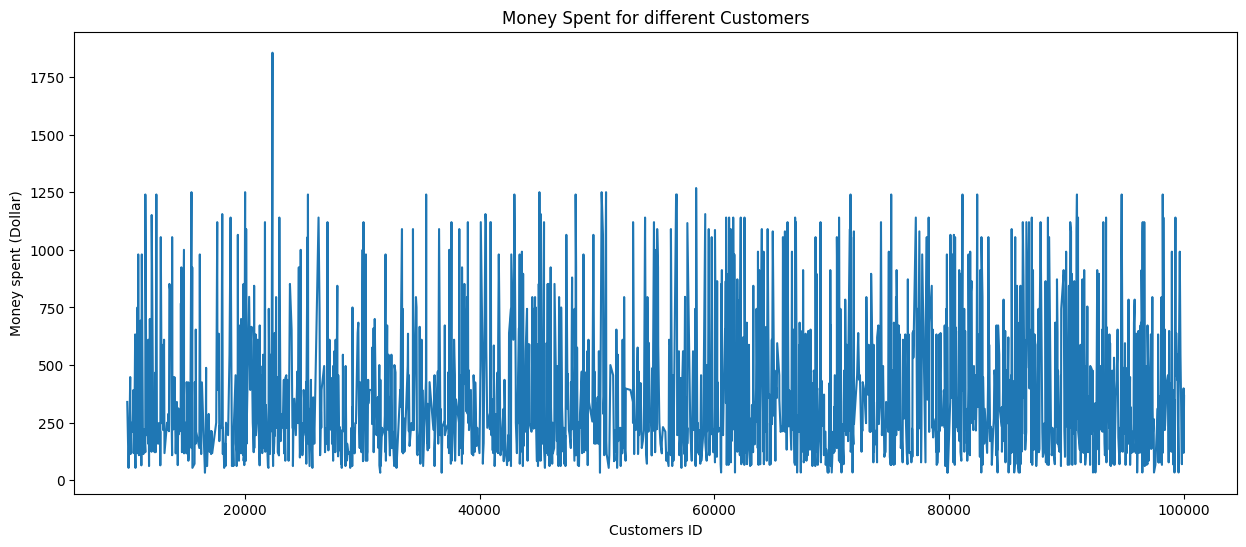

In [36]:
money_spent = df_small.groupby(by=['Customer_Id','Gender'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.Customer_Id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

**Check TOP 5 highest money spent**

In [37]:
print('The TOP 5 customers with highest money spent')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent


,Customer_Id,Gender,amount_spent
246,22370,Male,1855.0
977,58443,Male,1268.0
713,45100,Female,1250.0
118,15473,Male,1250.0
837,50397,Male,1250.0


In [38]:
# convert the Order_Date column from string to datetime
df_small['Order_Date'] = pd.to_datetime(df_small['Order_Date'])

**Add the columns - Month, Day and Hour**

In [39]:
df_small.insert(loc=2, column='year_month', value=df_small['Order_Date'].map(lambda x: 100*x.year + x.month))
df_small.insert(loc=3, column='month', value=df_small.Order_Date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_small.insert(loc=4, column='day', value=(df_small.Order_Date.dt.dayofweek)+1)
df_small.insert(loc=5, column='hour', value=df_small.Order_Date.dt.hour)

In [40]:
df_small

,Order_Date,Time,year_month,month,day,hour,Aging,Customer_Id,Gender,Device_Type,...,Product_Category,Product,Sales,Quantity,amount_spent,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
51219,2018-02-25,17:33:02,201802,2,7,0,3.0,93290,Male,Web,...,Home & Furniture,Sofa Covers,216.0,1.0,216.0,0.2,131.7,13.2,Medium,credit_card
21446,2018-12-28,18:59:41,201812,12,5,0,10.0,39103,Male,Web,...,Fashion,Jeans,218.0,1.0,218.0,0.5,105.3,10.5,Medium,money_order
37827,2018-04-26,20:52:35,201804,4,4,0,1.0,74911,Female,Web,...,Fashion,Titak watch,228.0,3.0,684.0,0.4,120.6,12.1,Medium,money_order
40863,2018-11-08,10:31:23,201811,11,4,0,6.0,85279,Female,Web,...,Fashion,Titak watch,228.0,2.0,456.0,0.4,129.8,13.0,Medium,credit_card
22180,2018-12-01,00:00:37,201812,12,6,0,2.0,22537,Male,Web,...,Fashion,Fossil Watch,159.0,2.0,318.0,0.4,66.3,6.6,Medium,money_order
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,2018-10-13,19:17:49,201810,10,6,0,8.0,23741,Male,Web,...,Fashion,Sports Wear,85.0,1.0,85.0,0.5,21.3,2.1,Medium,credit_card
3200,2018-06-27,20:56:12,201806,6,3,0,5.0,12343,Female,Web,...,Auto & Accessories,Bike Tyres,72.0,5.0,360.0,0.3,14.4,1.4,High,credit_card
30890,2018-06-10,19:10:18,201806,6,7,0,4.0,60529,Female,Web,...,Home & Furniture,Umbrellas,70.0,1.0,70.0,0.1,14.0,1.4,High,credit_card
26294,2018-05-19,10:55:03,201805,5,6,0,3.0,68611,Male,Web,...,Home & Furniture,Bed Sheets,211.0,5.0,1055.0,0.2,109.9,11.0,Medium,money_order


Text(0, 0.5, 'Number of Order Priority')

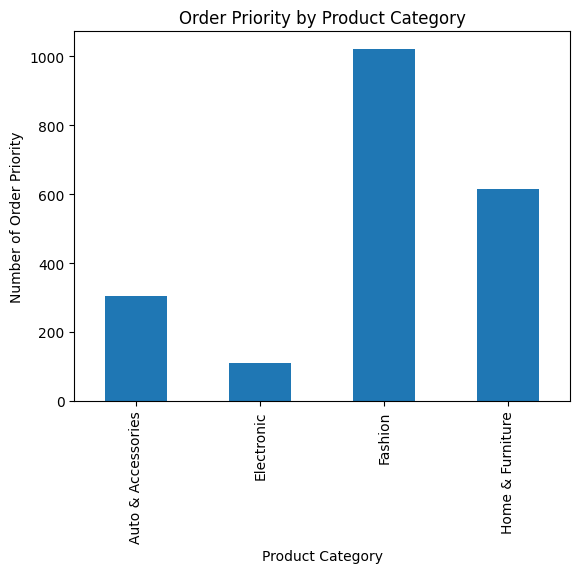

In [41]:
# Plot a bar graph of the order priority for each product category
df_small.groupby('Product_Category').count()['Order_Priority'].plot(kind='bar')

# Add a title and axis labels to the graph
plt.title("Order Priority by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Order Priority")

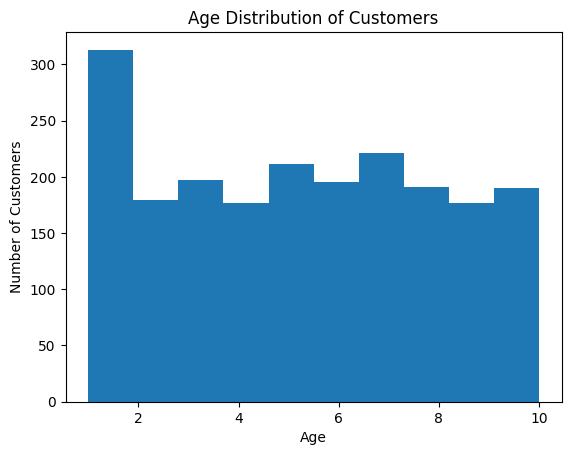

In [42]:
# Plot a histogram of the age of customers
df_small['Aging'].plot(kind='hist')

# Add a title and axis labels to the graph
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Show the plot
plt.show()

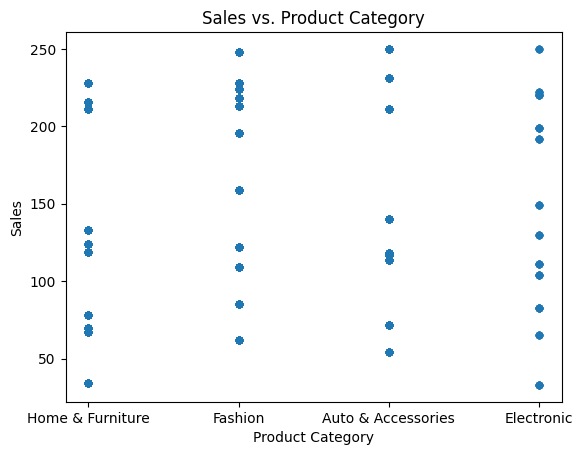

In [43]:
# Plot a scatter plot of  vs. age
df_small.plot(kind='scatter', x='Product_Category', y='Sales')

# Add a title and axis labels to the graph
plt.title("Sales vs. Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sales")

# Show the plot
plt.show()

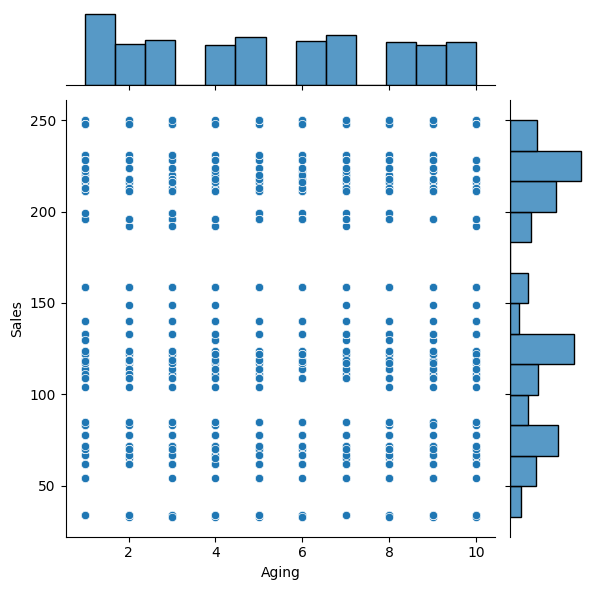

In [44]:
# Plot a scatter plot of sales vs. age
sns.jointplot(x='Aging', y='Sales', data=df_small)

# Show the plot
plt.show()

<ipython-input-45-745e1cd64f88>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_small.groupby(['month']).mean()['Sales'].plot(kind='line')


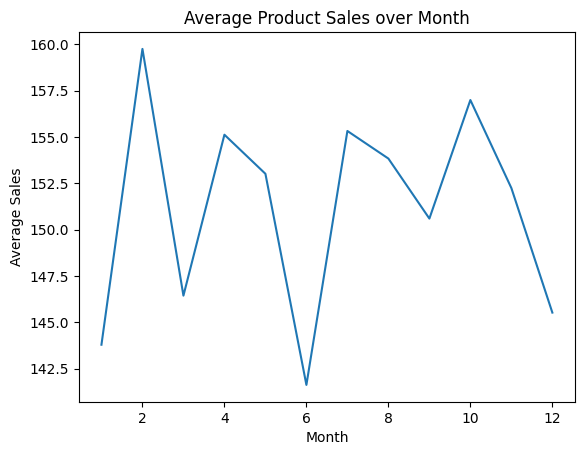

In [45]:
# Plot a line graph of the average sales of products over time
df_small.groupby(['month']).mean()['Sales'].plot(kind='line')

# Add a title and axis labels to the graph
plt.title("Average Product Sales over Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")

# Show the plot
plt.show()

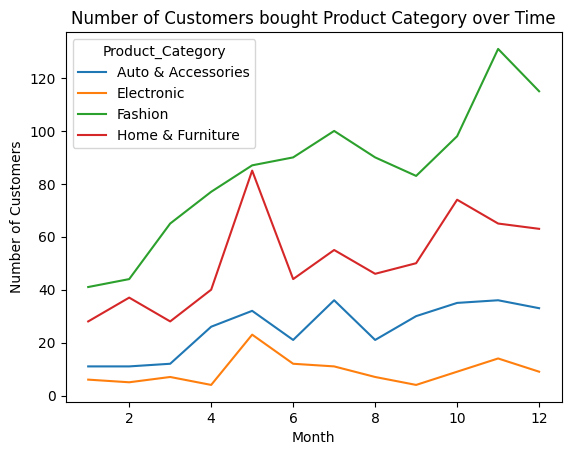

In [46]:
#Plot a line graph of the number of customers bought product category over time
df_small.groupby(['month', 'Product_Category']).count()['Customer_Id'].unstack().plot(kind='line')

# Add a title and axis labels to the graph
plt.title("Number of Customers bought Product Category over Time")
plt.xlabel("Month")
plt.ylabel("Number of Customers")

# Show the plot
plt.show()